In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, pearsonr

import os
import time
import itertools

from glove3.model import *

/home/jcthompson5@ad.wisc.edu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# import data 
df = pd.read_csv(f"data/EXP0004_35passages/35passages_fmt.csv")

# determine species names 
species = df.columns.values[2:]
species

array(['CD', 'DP', 'CA', 'PC', 'CS', 'CH', 'BU', 'BT', 'PV', 'EL'],
      dtype=object)

In [3]:
# instantiate gLV fit 
model = gLV(species, df)

# fit to data 
model.fit()

Total samples: 188, Initial regularization: 1.00e-03
Loss: 80.653, Residuals: -0.704
Loss: 63.761, Residuals: -0.460
Loss: 46.636, Residuals: -0.457
Loss: 43.403, Residuals: -0.187
Loss: 38.707, Residuals: -0.220
Loss: 32.795, Residuals: -0.240
Loss: 31.882, Residuals: -0.050
Loss: 30.189, Residuals: -0.052
Loss: 27.282, Residuals: -0.057
Loss: 26.645, Residuals: 0.081
Loss: 25.545, Residuals: 0.065
Loss: 24.299, Residuals: 0.039
Loss: 24.039, Residuals: 0.030
Loss: 23.861, Residuals: 0.081
Loss: 23.583, Residuals: 0.076
Loss: 23.548, Residuals: 0.072
Loss: 23.402, Residuals: 0.068
Loss: 23.347, Residuals: 0.097
Loss: 23.175, Residuals: 0.092
Loss: 22.869, Residuals: 0.081
Loss: 22.866, Residuals: 0.080
Loss: 22.502, Residuals: 0.066
Loss: 22.486, Residuals: 0.064
Loss: 22.460, Residuals: 0.079
Loss: 22.412, Residuals: 0.078
Loss: 22.322, Residuals: 0.074
Loss: 22.285, Residuals: 0.079
Loss: 22.283, Residuals: 0.080
Loss: 22.054, Residuals: 0.068
Loss: 22.052, Residuals: 0.071
Loss: 22

In [4]:
# list of parameter names 
param_names = []
for s1 in species:
    for s2 in species:
        param_names += [s1+"*"+s2]
param_names = list(species) + param_names

# plot parameter distribution
n_species = len(species)
Avec = model.params[n_species:n_species + n_species**2]
Aij_std = np.sqrt(np.diag(model.Ainv))[n_species:n_species + n_species**2]

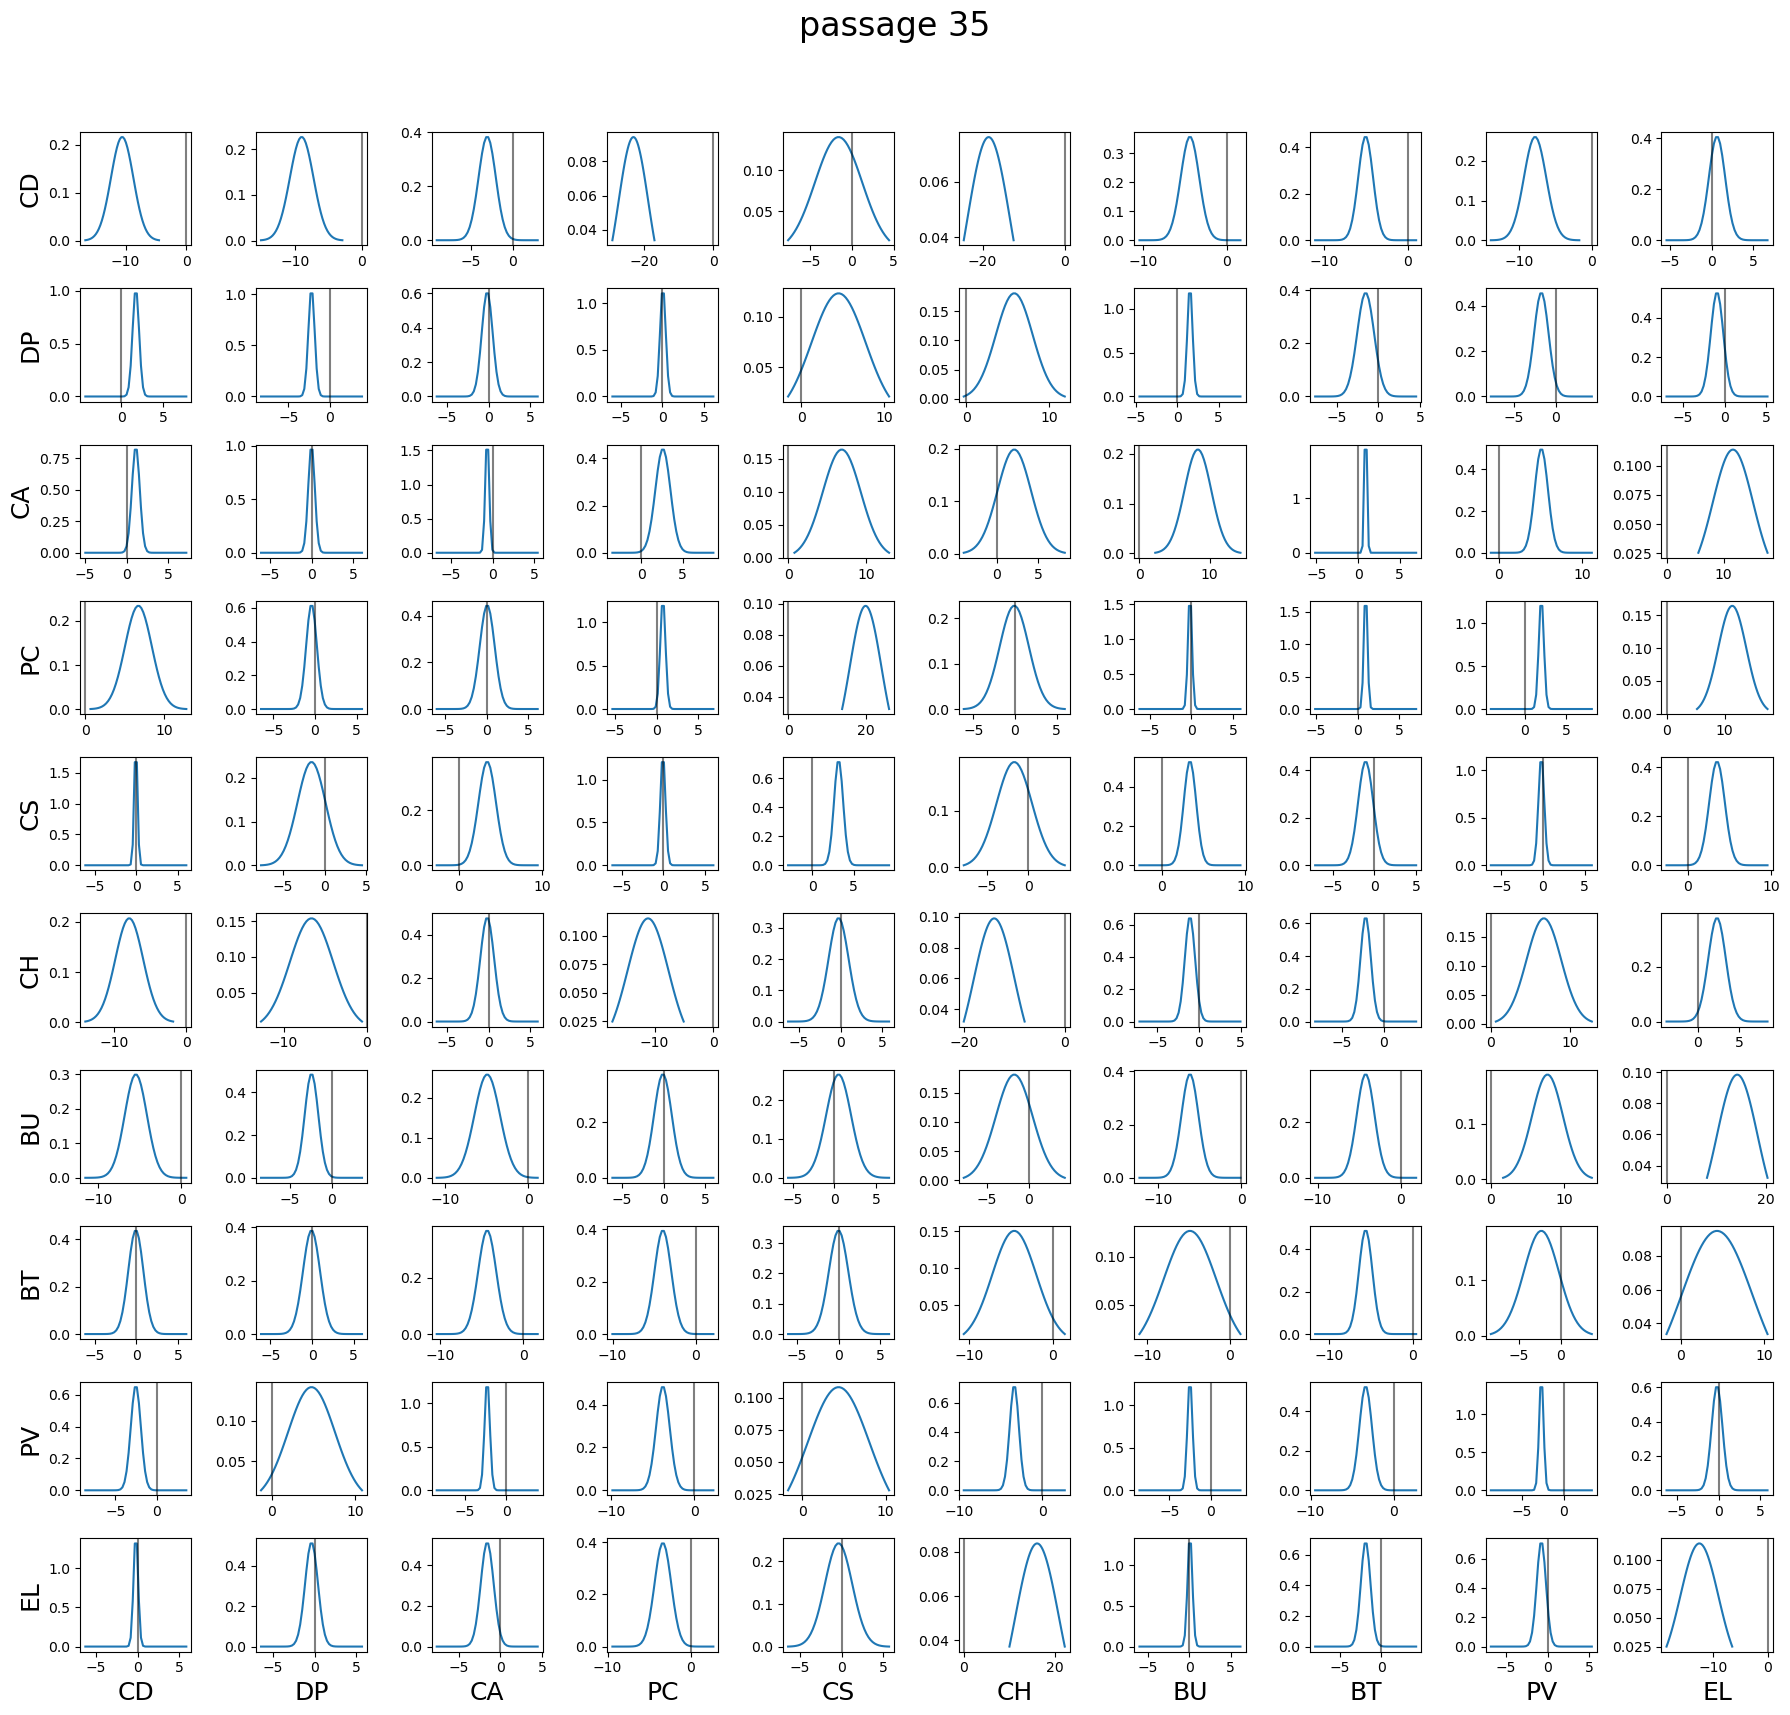

ValueError: Length of values (200) does not match length of index (110)

In [5]:
plt.figure(figsize=(18,18))
# set counter for parameter std. 
k = 0

for i in range(n_species):
    for j in range(n_species):
        plt.subplot(n_species, n_species, k+1)
        a = np.linspace(Avec[k]-np.std(Avec), Avec[k]+np.std(Avec))
        plt.plot(a, norm.pdf(a,Avec[k],Aij_std[k]))
        plt.axvline(x=0, c='k', alpha=.5)
        k += 1
        if j == 0:
            plt.ylabel(species[i], fontsize=18)
        if i == n_species-1:
            plt.xlabel(species[j], fontsize=18)
        #plt.xlim([-2,2])

plt.suptitle('passage 35', fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig(f"params/p35/P35.pdf")
plt.show()
plt.close()

# compute Wald test for each parameter
std_errors = np.sqrt(np.diag(model.Ainv))
walds = model.params/std_errors
wald_p_vals = 2*norm.cdf(-np.abs(walds))

# save to df 
df = pd.DataFrame()
df["Param name"] = param_names
df["Param value"] = model.params
df["Param stdv"]  = np.sqrt(np.diag(model.Ainv))
df["Param p-value"] = wald_p_vals
for j, param_name in enumerate(param_names):
    df[param_name]  = model.Ainv[:, j]
# df.to_csv(f"params/p35/P35.csv", index=False)

In [ ]:
df